In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('Diabetes/Diabetes_XTrain.csv').values
Y_train = pd.read_csv('Diabetes/Diabetes_YTrain.csv').values
X_test = pd.read_csv('Diabetes/Diabetes_Xtest.csv').values

In [3]:
print(X_train.shape,X_test.shape,Y_train.shape)

(576, 8) (192, 8) (576, 1)


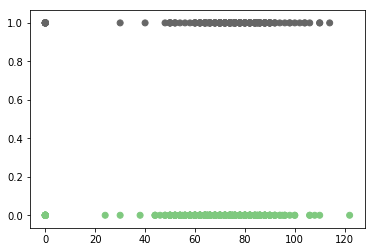

In [4]:
plt.scatter(X_train[:,2],Y_train,c=Y_train,cmap= plt.cm.Accent)
plt.show()

In [5]:
x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)

X_train = (X_train-x_mean)/x_std

In [6]:
X_test = (X_test-x_mean)/x_std

In [7]:
ones = np.ones((X_train.shape[0],1))
X_new_Train = np.hstack((ones,X_train))
X_new_Train.shape
Y_train = Y_train.reshape((-1,1))

In [8]:
ones = np.ones((X_test.shape[0],1))
X_new_Test = np.hstack((ones,X_test))
X_new_Test

array([[ 1.        , -1.13012711,  1.9064082 , ...,  0.57120908,
        -0.49765385,  0.1723264 ],
       [ 1.        , -0.52878465, -0.85676435, ...,  0.75575946,
         0.57180861, -0.83881117],
       [ 1.        , -0.52878465, -0.18979167, ..., -0.38845293,
        -1.15715571, -0.67028824],
       ...,
       [ 1.        , -1.13012711,  1.33471733, ...,  2.18294912,
        -0.3491174 , -0.58602678],
       [ 1.        ,  2.47792767, -1.14260979, ..., -0.26541934,
        -0.54815625,  1.09920249],
       [ 1.        , -1.13012711, -0.82500375, ..., -3.91951699,
        -0.66995614, -0.67028824]])

In [9]:
#df.to_csv('ChemicalsSegregation/Submission.csv',index=False)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()

In [12]:
model.fit(X_new_Train,Y_train)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
print(model.intercept_)
print(model.coef_)

[-0.43003723]
[[-0.43003723  0.35291998  1.11071371 -0.22002694 -0.02244134 -0.10573115
   0.74705981  0.30379024  0.09343691]]


In [14]:
df = model.predict(X_new_Test)
df.shape

(192,)

In [15]:
df = pd.DataFrame(df,columns=['Outcome'],dtype='int16')
df

,Outcome
0,1
1,0
2,0
3,0
4,0
...,...
187,0
188,0
189,1
190,0


In [16]:
df.to_csv('Diabetes/SubmissionSKLearn.csv',index=False)